In [17]:
import random
import copy
import logging
import sys

# from run_tests_201204 import *

import os
import sys
import importlib
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
from tools_pattern import get_eucledean_dist
import compress_pickle
import my_plot
from my_plot import MyPlotData, my_box_plot
import seaborn as sns

script_n = 'plot_210625_skewed_mf_dim'

data_script = 'batch_210623_dim_skewed_mfs'
db_path = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim2/' \
            f'{data_script}/'


scaled_noise = 0
core_noise = 0
n_mfs = 497
n_grcs = 1847

mf_lim = .5

pattern_type = 'binary'
db = {}

for model in ['observed', 'local_random']:
    for top in [-mf_lim, mf_lim, 1.0]:
        model_name = f'{model}_{top}'
        db[model_name] = compress_pickle.load(
            db_path + \
                f'{data_script}_{model}_{pattern_type}_{n_grcs}_{n_mfs}_'
                f'zmargin_10000_top_{top}_lim_{mf_lim}_'
                f'0.3_512_40.gz')
    

Height: 3.7593984962406015, Aspect: 1.33


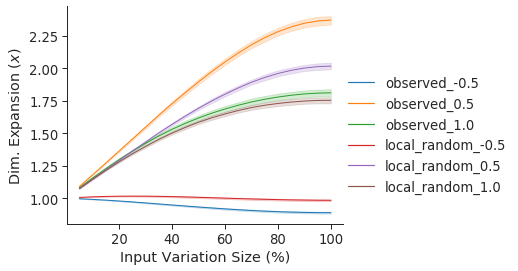

In [21]:

name_map = {
        'scaleup4': "Observed",
        'global_random': "Global Random",
        'random': "Global Random",
#         'naive_random_17': "Local Random",
        'local_random': "Local Random",
}

palette = {
    name_map['scaleup4']: sns.color_palette()[0],
    name_map['global_random']: sns.color_palette()[1],
    name_map['random']: sns.color_palette()[1],
    name_map['local_random']: sns.color_palette()[2],
#     name_map['naive_random_21']: sns.color_palette()[2],
}

# redundancies = [1.0, 3.0, 8.0, 12.0, 16.0, 24.0, 32.0, 48.0, 64.0]

mpd = MyPlotData()
# ress_ref = db['local_random'][0][0]
# resss_ref2 = db['local_random'][0]
for model_name in [
#         'local_random_2.0',
#         'local_random_3.0',
        'observed_-0.5',
        'observed_0.5',
        'observed_1.0',
        'local_random_-0.5',
        'local_random_0.5',
        'local_random_1.0',
#         'local_random_4.0',
#         'local_random_8.0',
#         'local_random_12.0',
#         'local_random_16.0',
#         'local_random_24.0',
#         'local_random_32.0',
#         'naive_random_17',
#         'naive_random4',
#         'random',
#         'scaleup4',
        ]:
    resss = db[model_name]
    ress_tries = resss[0]  # get the first element in tuple
#     ress = ress[0]  # get the first try
    for n_try, ress in enumerate(ress_tries):
#         print(resss_ref2[0])
#         print(resss_ref2.keys())
#         if n_try >= len(resss_ref2):
#             print(n_try)
#             continue
#         ress_ref2 = resss_ref2[n_try]
#         noise = .3
#         for noise in ress:
    #         print(noise)
        for noise in ress:
            res = ress[noise]
    #             res_ref = ress_ref[noise]
    #             res_ref2 = ress_ref2[noise]
    #         hamming_distance_norm = res['hamming_distance']/res['num_grcs']
            mpd.add_data_point(
                model=model_name,
                noise=noise*100,
    #                 grc_pcts=noise*100*2400/1200,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/5.5,
    #                 grc_dim_norm2=res['grc_dim']/avg_grc_dim[noise],
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
    #                 grc_by_mf_dim_ref=res['grc_dim']/res_ref['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
    #                 grc_pop_corr_norm=res['grc_pop_corr']/res_ref2['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                normalized_mse=res['normalized_mse'],
                )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='grc_by_mf_dim',
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=1,
#     log_scale_y=True,
    width=5,
#     ylim=[0, None],
    y_axis_label='Dim. Expansion ($x$)',
    x_axis_label='Input Variation Size (%)',
#     title='noise',
#     legend=None,
    save_filename=f'{script_n}_{noise}.svg',
    show=True,
    )


In [16]:
db.keys()

dict_keys(['observed_-0.33_0.33', 'observed_0.33_0.33', 'observed_1.0_0.33', 'observed_-0.5_0.5', 'observed_0.5_0.5', 'observed_1.0_0.5', 'local_random_-0.33_0.33', 'local_random_0.33_0.33', 'local_random_1.0_0.33', 'local_random_-0.5_0.5', 'local_random_0.5_0.5', 'local_random_1.0_0.5'])